# Music Popularity Analysis

<hr style="border:2px solid black"> </hr>

## Exploratory Data Analysis
## Notebook 01 - EDA

---

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def num_uniques(ser):
    try:
        return len(ser.unique())
    except:
        return "Not unique check-able"

In [3]:
def summarize_df(df):
    print("======DATA SUMMARY======")
    print("{} rows by {} columns".format(df.shape[0], df.shape[1]))
    print("\n======COLUMNS======")
    print(df.dtypes)
    print("\n======PREVIEW======")
    display(df.head())
    print("\n======NUMERICAL COL SUMMARY======")
    print(df.describe())
    print("\n")
    for col in df.columns:
        print("{}: {} unique values".format(col, num_uniques(df[col])))

---
### Import Data

In [4]:
df = pd.read_parquet('../02_DataPrep/song_data.parquet')

In [5]:
summarize_df(df)

======DATA SUMMARY======
26940 rows by 24 columns

======COLUMNS======
isrc                     object
sp_track_uri             object
mb_release_gid           object
mb_track_name            object
matched                  object
score                     int64
play_count                int64
sp_danceability         float64
sp_energy               float64
sp_key                    int64
sp_loudness             float64
sp_mode                   int64
sp_speechiness          float64
sp_acousticness         float64
sp_instrumentalness     float64
sp_liveness             float64
sp_valence              float64
sp_tempo                float64
sp_duration_ms            int64
sp_time_signature         int64
sp_artist_uri            object
sp_artist_popularity      int64
sp_genres                object
sp_artist_followers       int64
dtype: object

======PREVIEW======


,isrc,sp_track_uri,mb_release_gid,mb_track_name,matched,score,play_count,sp_danceability,sp_energy,sp_key,...,sp_instrumentalness,sp_liveness,sp_valence,sp_tempo,sp_duration_ms,sp_time_signature,sp_artist_uri,sp_artist_popularity,sp_genres,sp_artist_followers
0,AEA0D1937329,19JIYDxouJVup6Vju4XbHl,10fd2bac-ab04-4eb8-8428-f2068923bdf7,My Wasteland,My Wasteland,100,5,0.533,0.804,4,...,0.00069,0.1270,0.277,145.023,256073,4,5TIid55c3FutqRL4fzbnSF,0,[],52
1,AEA0D2084900,6DQKbMorKoc8I5dm72bZJi,4ac930af-fd16-4397-ba4c-f3727331d2c4,Hakuna Matata,Hakuna Matata,100,45,0.362,0.326,0,...,0.79400,0.1040,0.191,179.880,164792,4,29GcsJ0cD5bdbHpOicXLtF,23,['disney piano'],26
2,AEA0Q1967586,6k2GJRe3u6wHqaXL9XCt74,0df23deb-d8b5-4ef8-ae16-6865f6facc22,Farcry,Farcry,100,2,0.760,0.557,10,...,0.82200,0.0938,0.719,144.994,202893,4,0hvlHMDFpZBDFPEVgcAX6s,0,[],2027
3,AEA0Q2041540,6xCie6yrUQh0McImPanmGq,88532401-a81e-4af7-bcfa-397ce6c4f6cc,Self Isolation,Self Isolation,100,1631,0.635,0.323,2,...,0.53500,0.0974,0.209,179.996,156000,4,0XFgyr4jwM0MGeZZW0VzA5,74,[],184864
4,RUA1H2153459,1hSu17dJJcu40C7JwXnzTm,5611c030-2d68-4c99-9633-af0c59e296e6,Die With a Smile on Your Face,Die with a Smile on Your Face,100,2875,0.664,0.440,1,...,0.18100,0.0536,0.256,74.735,217600,4,0XFgyr4jwM0MGeZZW0VzA5,74,[],184864



======NUMERICAL COL SUMMARY======
              score    play_count  sp_danceability     sp_energy  \
count  26940.000000  2.694000e+04     26940.000000  26940.000000   
mean      98.614031  1.969753e+05         0.529161      0.614964   
std        3.651687  9.166851e+05         0.185528      0.263511   
min       80.000000  0.000000e+00         0.000000      0.000000   
25%      100.000000  1.840000e+02         0.403000      0.431000   
50%      100.000000  2.852500e+03         0.540000      0.655000   
75%      100.000000  3.638050e+04         0.666000      0.838000   
max      100.000000  2.399470e+07         0.977000      1.000000   

             sp_key   sp_loudness       sp_mode  sp_speechiness  \
count  26940.000000  26940.000000  26940.000000    26940.000000   
mean       5.215071     -9.120079      0.623125        0.087248   
std        3.584864      5.439261      0.484612        0.103623   
min        0.000000    -60.000000      0.000000        0.000000   
25%        2.0000

In [6]:
num_vars = ['sp_danceability', 'sp_energy', 'sp_loudness', 'sp_speechiness', 'sp_acousticness', 'sp_instrumentalness', 'sp_liveness', 'sp_valence', 'sp_tempo', 'sp_duration_ms', 'sp_artist_popularity', 'sp_artist_followers', 'play_count']

cat_vars = ['sp_key', 'sp_mode', 'sp_time_signature']

---
### Univariate summaries

In [7]:
def numeric_summ(s):
    print('\n\n{}'.format(s.name))
    print("======SUMMARY======")
    print(s.describe())
    print("\n======DENSITY PLOT======")
    if s.name=='play_count' or s.name=='sp_artist_followers' or s.name=='sp_duration_ms':
        sns.displot(data=s[s>0], kde=True, log_scale=True)
        plt.title('{} density plot log'.format(s.name))
        plt.show()
    sns.displot(data=s, kde=True)
    plt.title('{} density plot'.format(s.name))
    plt.show()
    print("\n======BOX & WHISKER======")
    sns.boxplot(s)
    plt.title('{} boxplot'.format(s.name))
    plt.show()

In [8]:
def categorical_summ(s):
    print('\n\n{}'.format(s.name))
    print("======SUMMARY======")
    print(s.describe())
    print("\n======DENSITY PLOT======")
    sns.countplot(x=s)
    plt.title('{} count plot'.format(s.name))
    plt.show()



play_count
======SUMMARY======
count    2.694000e+04
mean     1.969753e+05
std      9.166851e+05
min      0.000000e+00
25%      1.840000e+02
50%      2.852500e+03
75%      3.638050e+04
max      2.399470e+07
Name: play_count, dtype: float64

======DENSITY PLOT======


KeyboardInterrupt: 

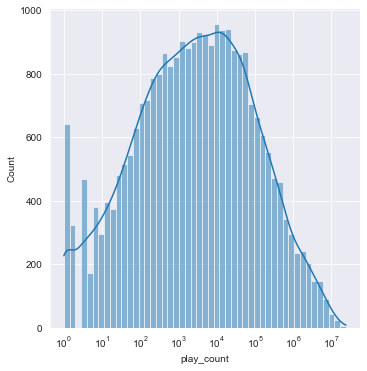

In [9]:
for s in df:
    if s in cat_vars:
        categorical_summ(df[s])
    elif s in num_vars:
        numeric_summ(df[s])

---
### Multivariate summaries

In [ ]:
# Correlation plot
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.tight_layout()
plt.savefig('corrplot.png')

In [ ]:
# Pairplot with play_count
fig, axes = plt.subplots(4, int(np.ceil(len(num_vars + cat_vars)/4)), figsize=(18, 10))

i = 0
for s in num_vars + cat_vars:
    if s != 'play_count':
        g = sns.scatterplot(x=df[s], y=df['play_count'], ax=axes[int(np.floor(i / 4)), i % 4])
        i += 1

plt.tight_layout()
plt.savefig('pairplot.png')
plt.show()